In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import multivariate_normal
from scipy.stats import shapiro, chi2
from scipy.spatial.distance import mahalanobis

In [10]:
df=pd.read_csv('Customer Purchasing Behaviors.csv')
grouped = df.drop(columns=['user_id']).groupby(df['region'].map(lambda x: 'North-East' if x in ['North', 'East'] else 'South-West'))
df1 = grouped.get_group('North-East')
df2 = grouped.get_group('South-West')

Mean Vector:
[1.19500000e+02 3.86764706e+01 5.74075630e+04 4.25630252e+02
 6.79411765e+00 1.97983193e+01]

Covariance Matrix:
[[4.74016667e+03 4.31751055e+01 4.63481013e+04 7.77383966e+02
  7.95189873e+00 2.21603376e+01]
 [4.31751055e+01 8.74434103e+01 1.03955200e+05 1.29149169e+03
  1.74356416e+01 4.18374286e+01]
 [4.63481013e+04 1.03955200e+05 1.30048381e+08 1.57191504e+06
  2.13175974e+04 5.11458355e+04]
 [7.77383966e+02 1.29149169e+03 1.57191504e+06 1.96145800e+04
  2.64408786e+02 6.34937773e+02]
 [7.95189873e+00 1.74356416e+01 2.13175974e+04 2.64408786e+02
  3.60637875e+00 8.55239514e+00]
 [2.21603376e+01 4.18374286e+01 5.11458355e+04 6.34937773e+02
  8.55239514e+00 2.08199128e+01]]

Generated Sample from the Fitted Distribution:
[[1.65356103e+01 5.72074842e+01 8.17376815e+04 7.19226159e+02
  1.08675632e+01 2.91759393e+01]
 [1.19629564e+02 4.58674695e+01 6.45158794e+04 5.51775684e+02
  8.30182808e+00 2.43848013e+01]
 [1.77843211e+02 6.68839533e+01 9.40371163e+04 8.97816999e+02
  1

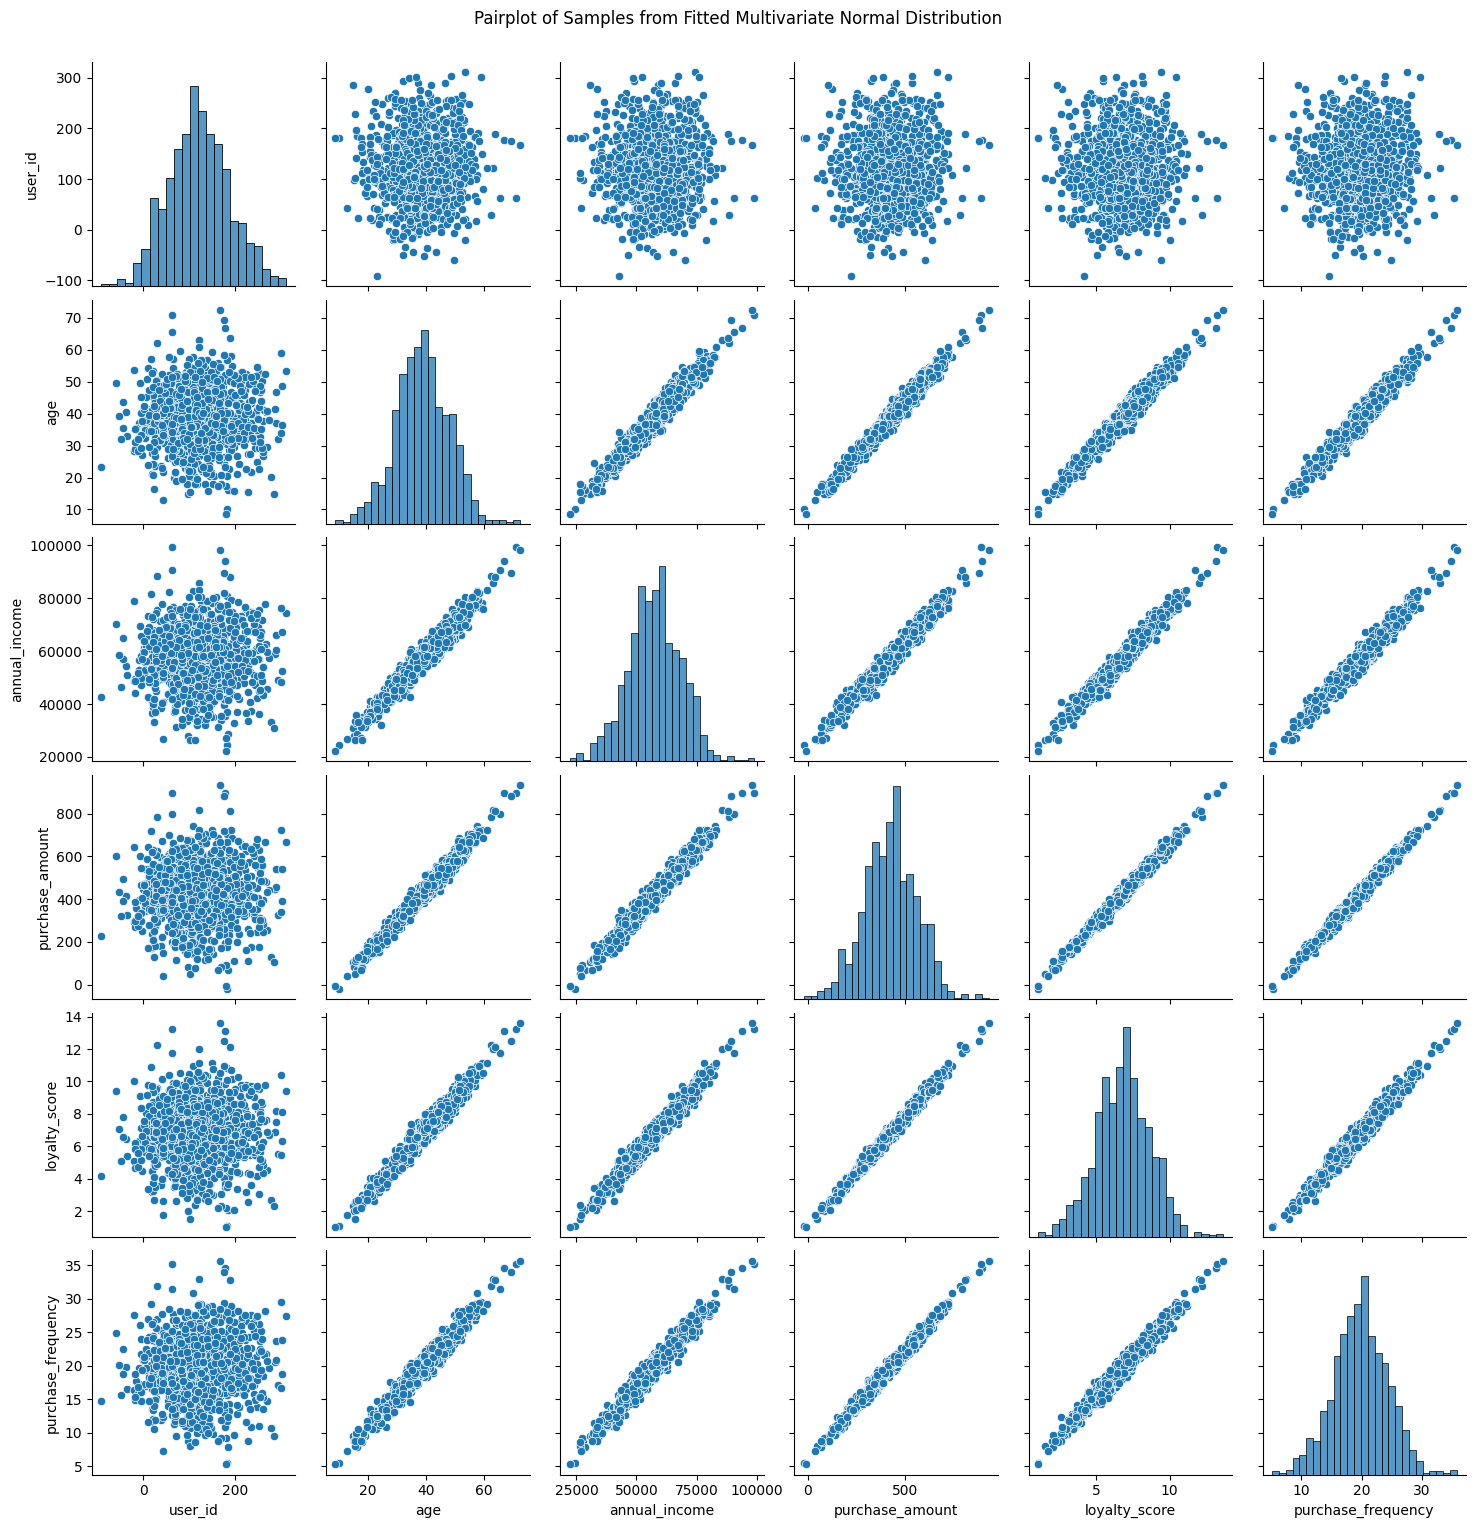

In [11]:
# df = pd.read_csv('Customer Purchasing Behaviors.csv')
# Extract numeric columns (excluding categorical features like 'region')
numeric_columns = df.select_dtypes(include='number')
numeric_data = numeric_columns.values

# Step 1: Calculate the mean vector
mean_vector = np.mean(numeric_data, axis=0)
print("Mean Vector:")
print(mean_vector)

# Step 2: Calculate the covariance matrix
cov_matrix = np.cov(numeric_data.T)  # Transpose because np.cov expects variables in rows
print("\nCovariance Matrix:")
print(cov_matrix)

# Step 3: Fit the Multivariate Normal Distribution
# Using the mean and covariance matrix to define the multivariate normal
multivar_dist = multivariate_normal(mean=mean_vector, cov=cov_matrix)

# Step 4: Sample from the fitted distribution (Optional: For visualization)
sample = multivar_dist.rvs(size=1000)  # Generate 1000 samples
print("\nGenerated Sample from the Fitted Distribution:")
print(sample[:5])  # Display first 5 rows of generated samples

# Step 5: Visualize (Optional) - Pairplot of generated data
import seaborn as sns

# Creating a DataFrame from the generated samples for easy plotting
sample_df = pd.DataFrame(sample, columns=numeric_columns.columns)
sns.pairplot(sample_df)
plt.suptitle("Pairplot of Samples from Fitted Multivariate Normal Distribution", y=1.02)
plt.show()


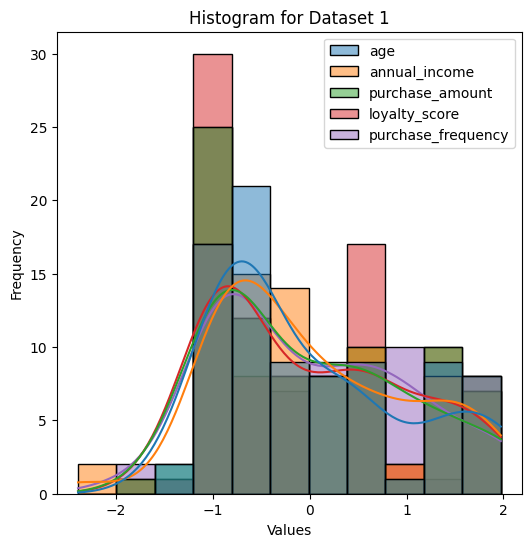

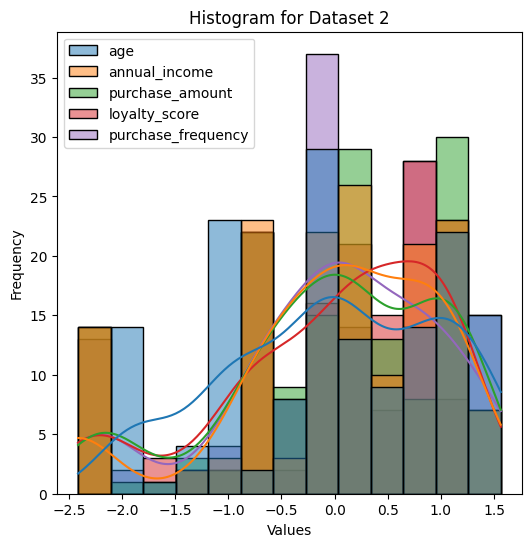

Mardia's Test Results for Dataset 1:
  Skewness: [1.23957999e+00 3.92295236e+00 8.44188507e-01 4.26057781e-03
 1.32247224e-02 7.89818737e-02 1.48839301e-03 2.63605897e+00
 8.52951533e-03 2.75950936e-04 5.04943264e-02 2.45349804e-04
 3.92093167e-03 7.05630511e-01 3.22799263e+00 4.31026990e-03
 1.90047548e-02 4.23294888e-03 8.52951533e-03 1.74900953e-01
 1.26408812e-03 2.75950936e-04 2.45349804e-04 4.12250508e-03
 5.83008047e-03 4.31026990e-03 1.32247224e-02 5.93595527e-05
 8.52951533e-03 4.23294888e-03 1.26408812e-03 2.75950936e-04
 2.45349804e-04 4.12250508e-03 5.83008047e-03 4.31026990e-03
 1.32247224e-02 5.93595527e-05 8.52951533e-03 4.23294888e-03
 1.26408812e-03 2.75950936e-04 2.45349804e-04 4.12250508e-03
 5.83008047e-03 4.31026990e-03 1.32247224e-02 5.93595527e-05
 8.52951533e-03 4.23294888e-03 1.26408812e-03 2.75950936e-04
 2.45349804e-04 4.12250508e-03 5.83008047e-03 4.31026990e-03
 1.32247224e-02 5.93595527e-05 8.52951533e-03 4.23294888e-03
 1.26408812e-03 2.75950936e-04 2.453

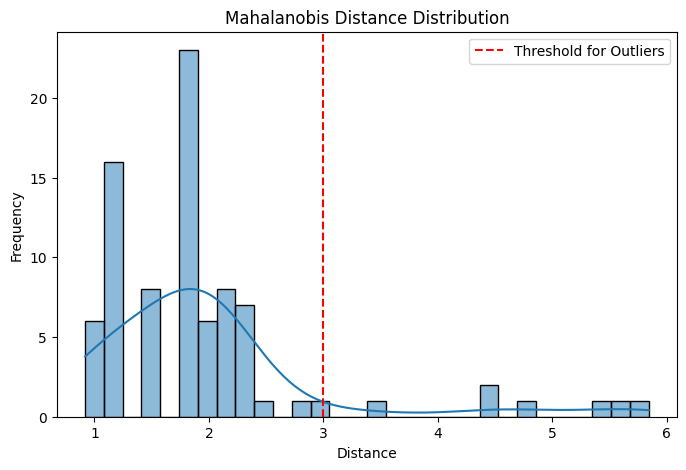

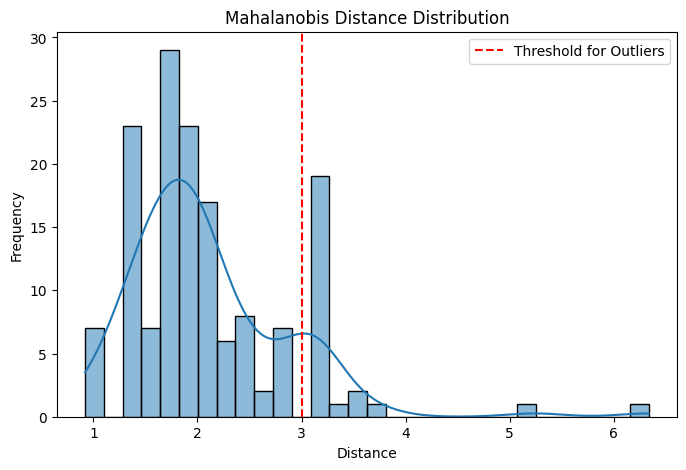

In [16]:
numeric_cols = ['age', 'annual_income', 'purchase_amount', 'loyalty_score', 'purchase_frequency']
data1 = df1[numeric_cols]
data2 = df2[numeric_cols]
# Normalize the data
data1 = (data1 - data1.mean()) / data1.std()
data2 = (data2 - data2.mean()) / data2.std()

# Visual Assessment - Q-Q Plot
def qq_plot(data, title):
    plt.figure(figsize=(6, 6))
    sns.histplot(data, kde=True)
    plt.title(title)
    plt.xlabel('Values')
    plt.ylabel('Frequency')
    plt.show()

qq_plot(data1, "Histogram for Dataset 1")
qq_plot(data2, "Histogram for Dataset 2")

# Mardia's Test for Multivariate Normality
def mardias_test(data):
    n, p = data.shape
    mean = np.mean(data, axis=0)
    cov_matrix = np.cov(data, rowvar=False)

    # Calculate the Mardia's skewness
    diff = data - mean

    mardia_skew = skewness = (n / (n - 1) / (n - 2)) * np.sum((data - mean) @ np.linalg.inv(cov_matrix) * (data - mean), axis=1) ** 3 / (p ** 3)

    # Calculate the Mardia's kurtosis
    mardia_kurt = (n * (n + 1) * np.sum(np.sum(diff @ np.linalg.inv(cov_matrix) * diff, axis=1) ** 2)
                    / ((n - 1) * (n - 2) * (n - 3) * p ** 2)) - 3 * (n - 1) ** 2 / ((n - 2) * (n - 3))
    
    return mardia_skew, mardia_kurt

# Test the datasets
mardia1 = mardias_test(data1.values)
mardia2 = mardias_test(data2.values)

print("Mardia's Test Results for Dataset 1:")
print(f"  Skewness: {mardia1[0]}, Kurtosis: {mardia1[1]}")
# print pvalue for skewness and kurtosis
print("P-value for skewness and kurtosis for dataset 1")
    


print("Mardia's Test Results for Dataset 2:")
print(f"  Skewness: {mardia2[0]}, Kurtosis: {mardia2[1]}")

# print pvalue for skewness and kurtosis
print("P-value for skewness and kurtosis for dataset 2")


# Outlier Detection using Mahalanobis Distance
def detect_outliers(data):
    mean = np.mean(data, axis=0)
    cov_matrix = np.cov(data, rowvar=False)
    inv_cov_matrix = np.linalg.inv(cov_matrix)
    outliers = []

    # Calculate Mahalanobis distance
    for i in range(data.shape[0]):
        dist = mahalanobis(data[i], mean, inv_cov_matrix)
        if dist > 3:  # Threshold for outliers
            outliers.append(i)

    return outliers

outliers1 = detect_outliers(data1.values)
outliers2 = detect_outliers(data2.values)

# Report outliers
print("Outliers in Dataset 1:", len(outliers1))
print("Outliers in Dataset 2:", len(outliers2))

# Plotting Mahalanobis Distance
def plot_mahalanobis(data, outliers):
    mean = np.mean(data, axis=0)
    cov_matrix = np.cov(data, rowvar=False)
    inv_cov_matrix = np.linalg.inv(cov_matrix)
    md = []

    # Calculate Mahalanobis distances for all points
    for i in range(data.shape[0]):
        dist = mahalanobis(data[i], mean, inv_cov_matrix)
        md.append(dist)

    # Plotting
    plt.figure(figsize=(8, 5))
    sns.histplot(md, bins=30, kde=True)
    plt.axvline(3, color='r', linestyle='--', label='Threshold for Outliers')
    plt.title('Mahalanobis Distance Distribution')
    plt.xlabel('Distance')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

plot_mahalanobis(data1.values, outliers1)
plot_mahalanobis(data2.values, outliers2)